# Video Game Sales
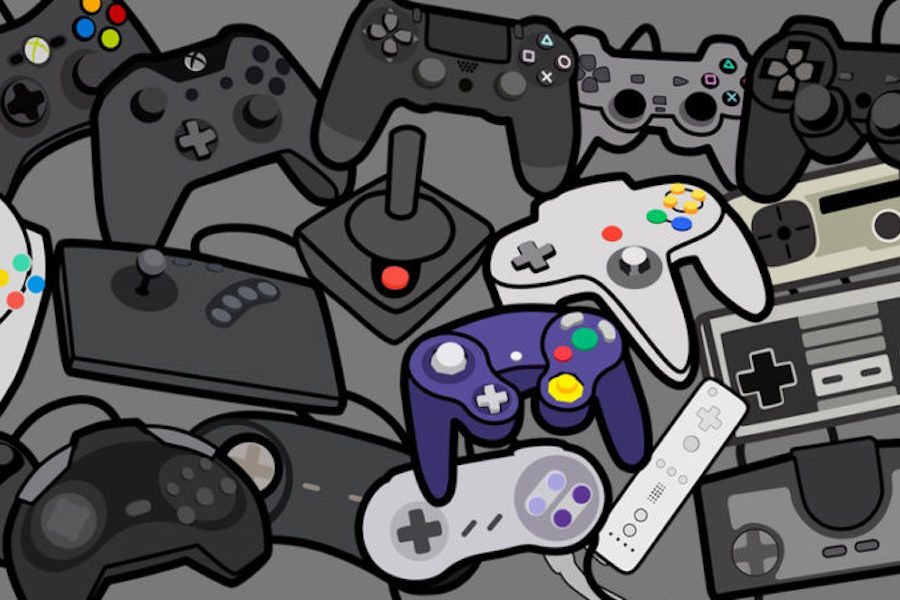

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the CSV file and taking a look at the DataFrame in general

In [2]:
sales = pd.read_csv('vgsales.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Checking for the amount of null values between columns

In [4]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since we found rows with NULL values, we should drop those since it will not have any benefit keeping it

In [5]:
sales = sales.dropna()
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

As we could notice before, our 'Year' column is currently on a float64 format, so I should change it to int32

In [6]:
sales['Year']= sales['Year'].astype('int')
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Here is a **VERY IMPORTANT** step, I will now filter the entries, I will only take entries where the Year of release is >=2000

In [7]:
sales = sales.drop(sales[sales.Year < 2000].index)

Now, another step of cleaning, I will check if the Entries for the 'Global_Sales' really match the Original formula (NA+EU+JP+Other Sales)

In [8]:
sales['Calc_Global']= (sales['NA_Sales'] + sales['EU_Sales'] + sales['JP_Sales'] + sales['Other_Sales'])
sales['Calc_Global'].head()

0    82.74
2    35.83
3    33.00
6    30.01
7    29.01
Name: Calc_Global, dtype: float64

In [9]:
(sales['Calc_Global'] != sales['Global_Sales']).sum()

5947

The result above shows that there were mistakes during the data entry process (However, I currently do not know how to fix it)

In [10]:
sales['Year'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
       2015, 2012, 2014, 2003, 2000, 2016, 2020, 2017])

> Checking if our Year>=2000 filter works
#### Great! Now we will go through the process and start analyzing

## Sales Analysis
> This analysis will be done by Regions (NA, EU, JP and Other), and then I will do a Global Analysis too.
### NA Analysis
> Starting off, I will run the analysis on the North American Region, only releases between the Years 2000~2020 will be considered.

#### To begin, I will use groupby() to filter only the NA_Sales per Genre and plot a bar graph to conclude which Genres were the most sold 

In [11]:
NA_genre = sales.groupby(by=['Genre'])['NA_Sales'].sum()
NA_genre = NA_genre.reset_index()
NA_genre = NA_genre.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Genre (Years 2000 to 2020)')

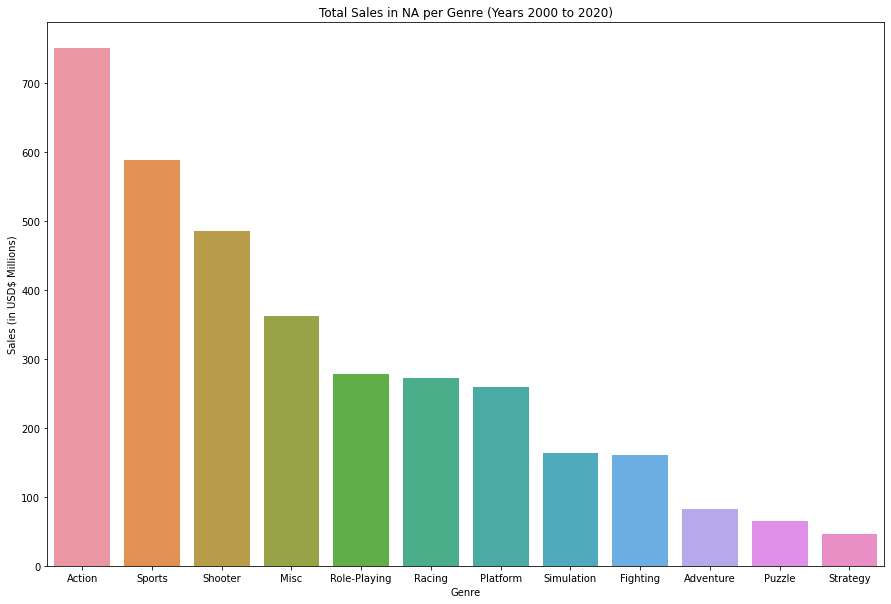

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="NA_Sales",data=NA_genre)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Genre (Years 2000 to 2020)')

> As we can observe above, Action was by far the best seller, with Sports and Shooter right below.


#### Now we will check which platforms were the most requisited 

In [13]:
NA_plat = sales.groupby(by=['Platform'])['NA_Sales'].sum()
NA_plat = NA_plat.reset_index()
NA_plat = NA_plat.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Platform (Years 2000 to 2020)')

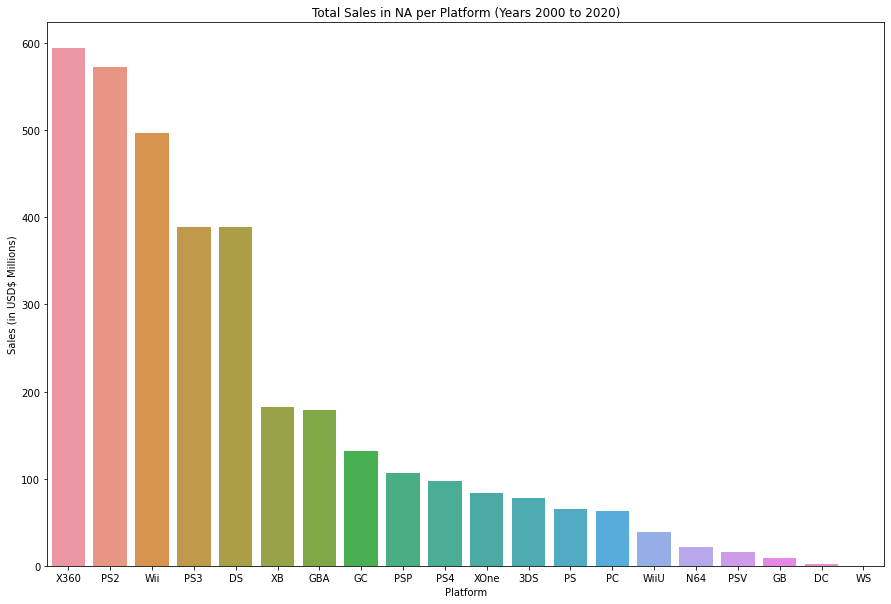

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales",data=NA_plat)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Platform (Years 2000 to 2020)')

> Success, XBOX360 takes the first spot, but not far from PS2 followed by Wii.

#### Finally, Publishers are next.

In [15]:
NA_pub = sales[['Publisher', 'NA_Sales']]
NA_pub = NA_pub.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(10)
NA_pub = pd.DataFrame(NA_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

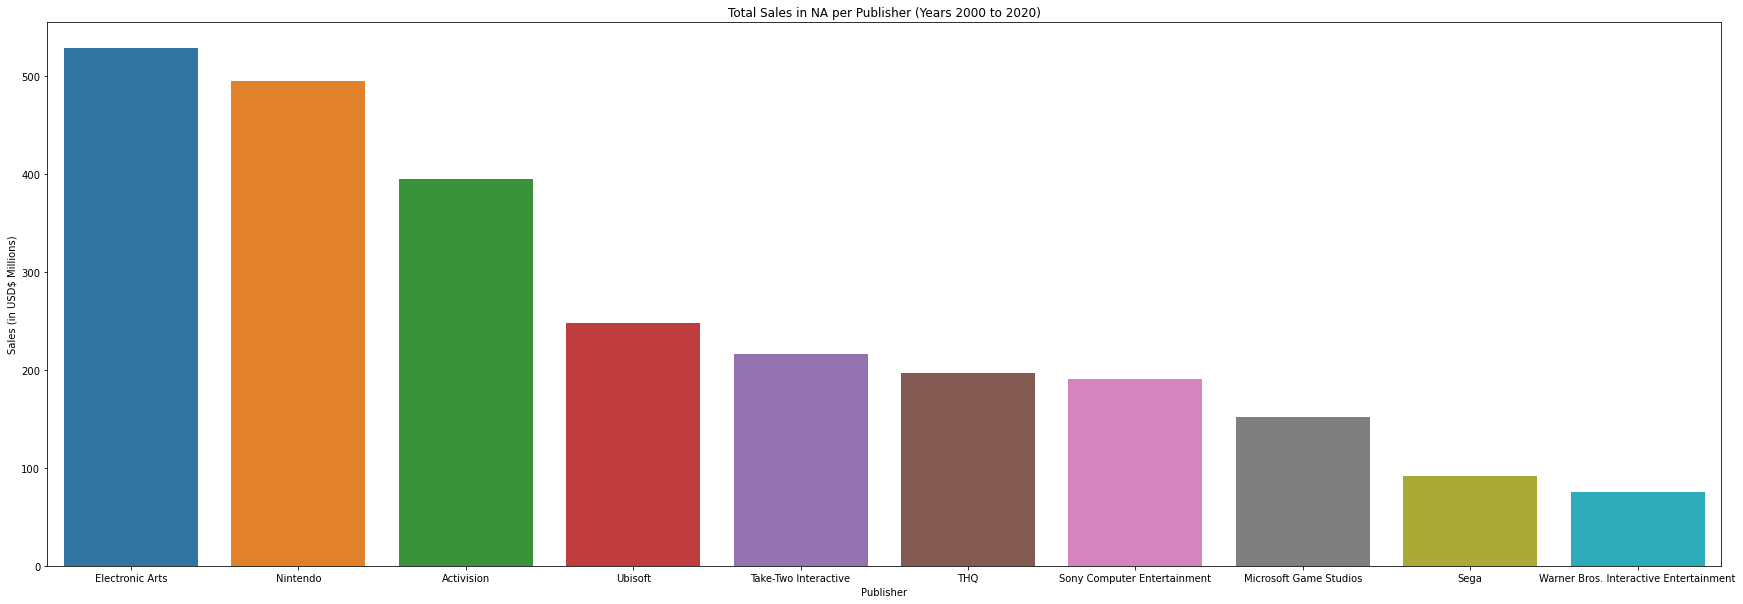

In [16]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="NA_Sales",data=NA_pub)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

> Our results show that EA, Nintendo and Activision as the Top 3

#### Next, we will check what genres does these publishers produce the most
# //////////////////////////////////////////////////////

### EU Analysis
> I will now run the analysis on the European Region, only releases between the Years 2000~2020 will be considered.

#### Sales per Genre

In [20]:
EU_genre = sales.groupby(by=['Genre'])['EU_Sales'].sum()
EU_genre = EU_genre.reset_index()
EU_genre = EU_genre.sort_values(by=['EU_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

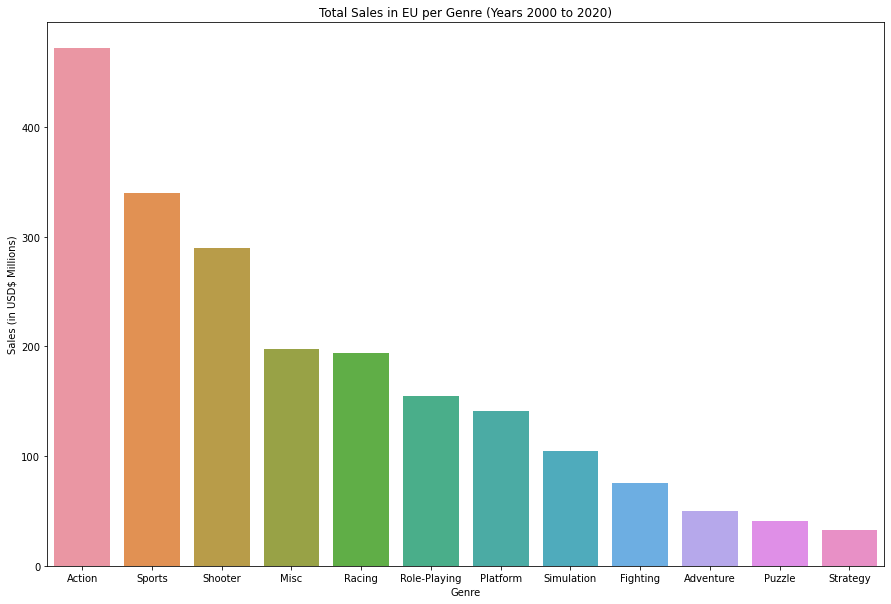

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="EU_Sales",data=EU_genre)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

> Similar trend to NA, however, the region has less sales overall and racing takes 5th position if compared to NA's 6th.

#### Most Requisited Platforms

In [23]:
EU_plat = sales.groupby(by=['Platform'])['EU_Sales'].sum()
EU_plat = EU_plat.reset_index()
EU_plat = EU_plat.sort_values(by=['EU_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

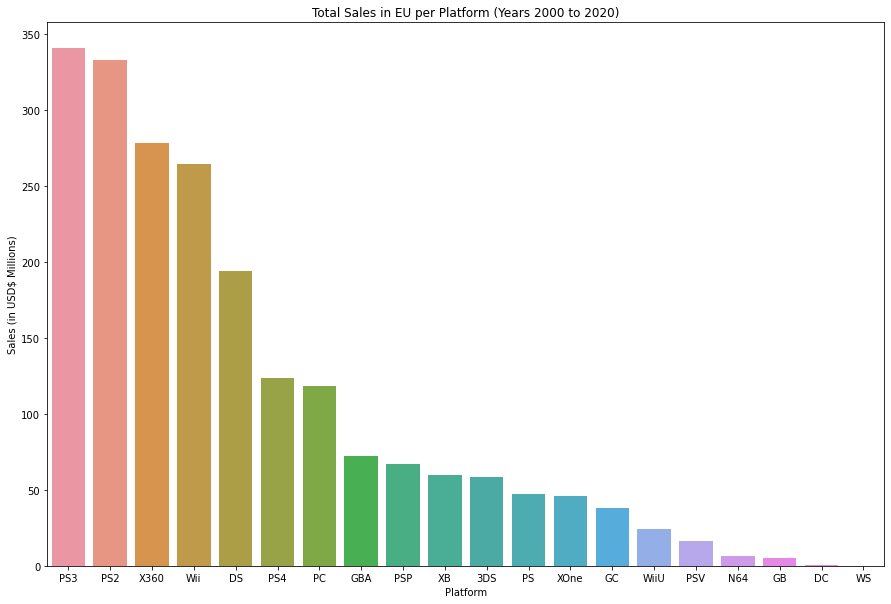

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="EU_Sales", data=EU_plat)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

> Here we can see a big difference between regions, with PS3 leading instead of NA's XBOX360

#### Sales per Publisher

In [27]:
EU_pub = sales[['Publisher', 'EU_Sales']]
EU_pub = EU_pub.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).head(10)
EU_pub = pd.DataFrame(EU_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

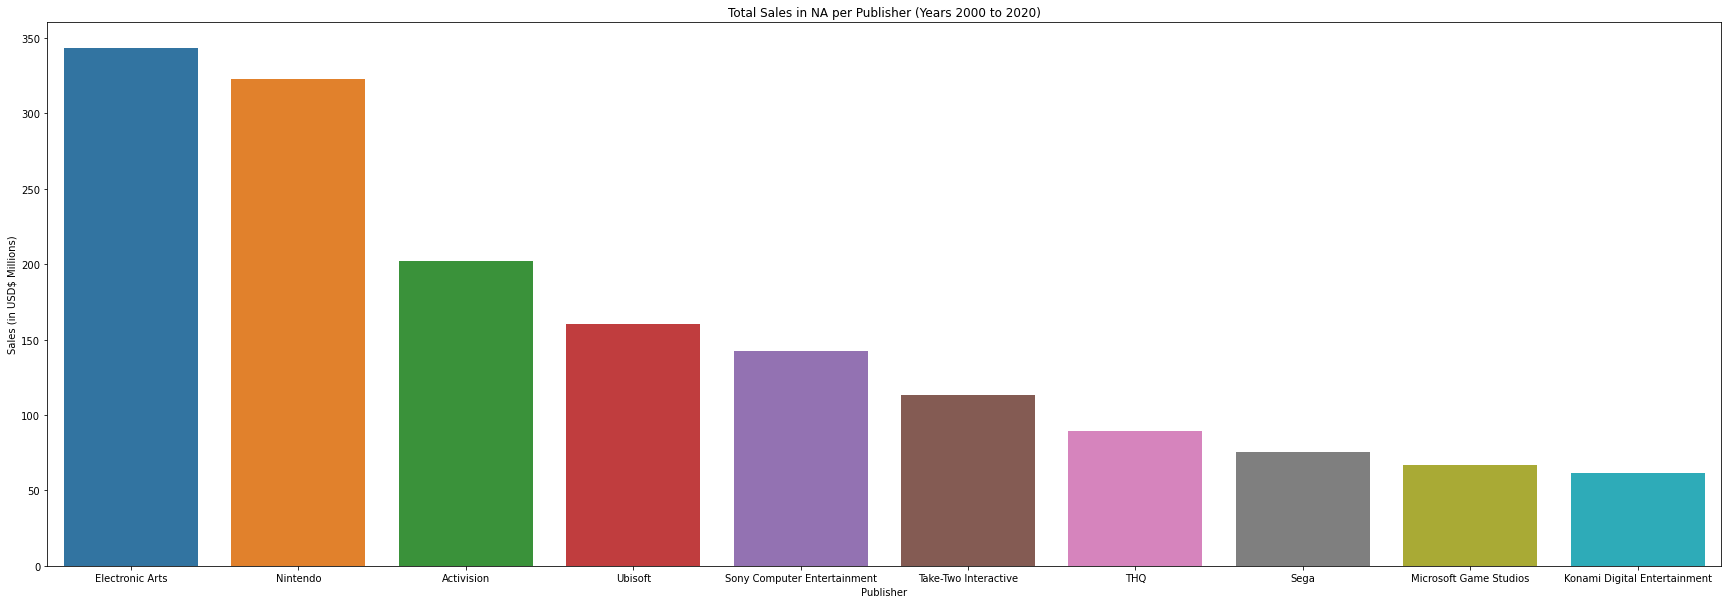

In [28]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="EU_Sales",data=EU_pub)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

> Similar trend to NA's, however Sony Computer Entertainment has a better placement

# //////////////////////////////////////////////////////

### JP Analysis

### Sales per Genre

In [30]:
JP_genre = sales.groupby(by=['Genre'])['JP_Sales'].sum()
JP_genre = JP_genre.reset_index()
JP_genre = JP_genre.sort_values(by=['JP_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

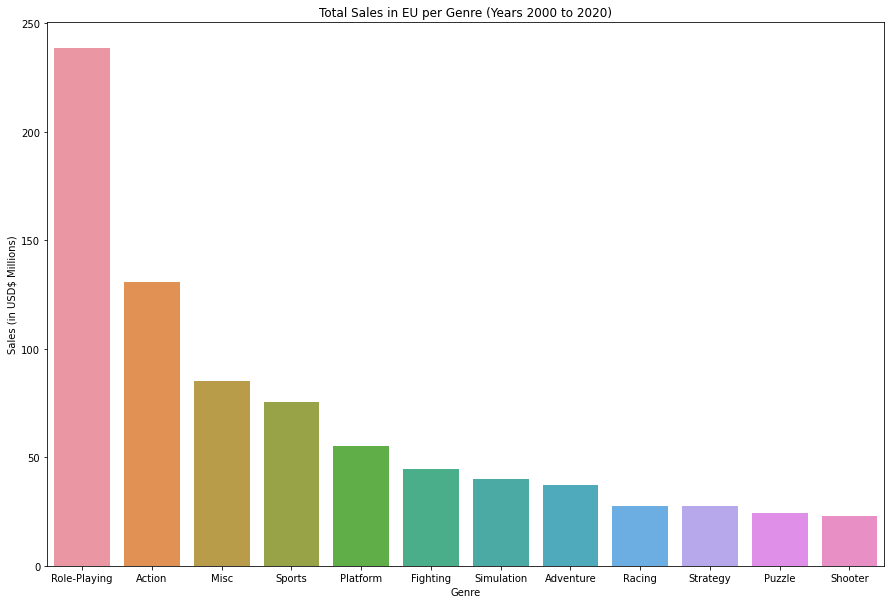

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="JP_Sales",data=JP_genre)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

> Now that is a big shift, the graph shows that the Action as rank 1 genre is not true for Japan, customers there prefer Role-Playing more than any other genre.

#### Most Requisited Platforms

In [32]:
JP_plat = sales.groupby(by=['Platform'])['JP_Sales'].sum()
JP_plat = JP_plat.reset_index()
JP_plat = JP_plat.sort_values(by=['JP_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

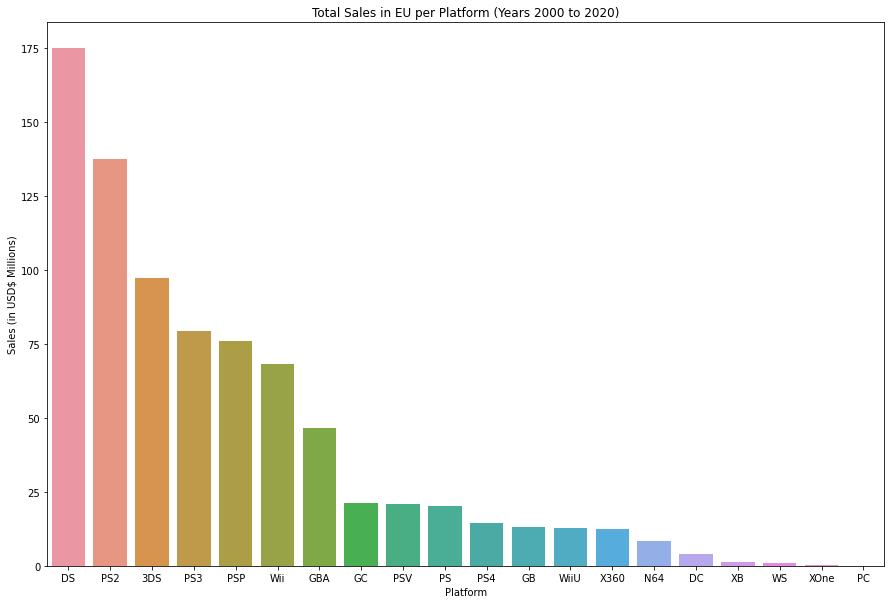

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="JP_Sales", data=JP_plat)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

> Another big difference highlighted by this graph, DS is the top ranked Platform with a certain margin from PS2.

#### Sales per Publisher

In [40]:
JP_pub = sales[['Publisher', 'JP_Sales']]
JP_pub = JP_pub.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(10)
JP_pub = pd.DataFrame(JP_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

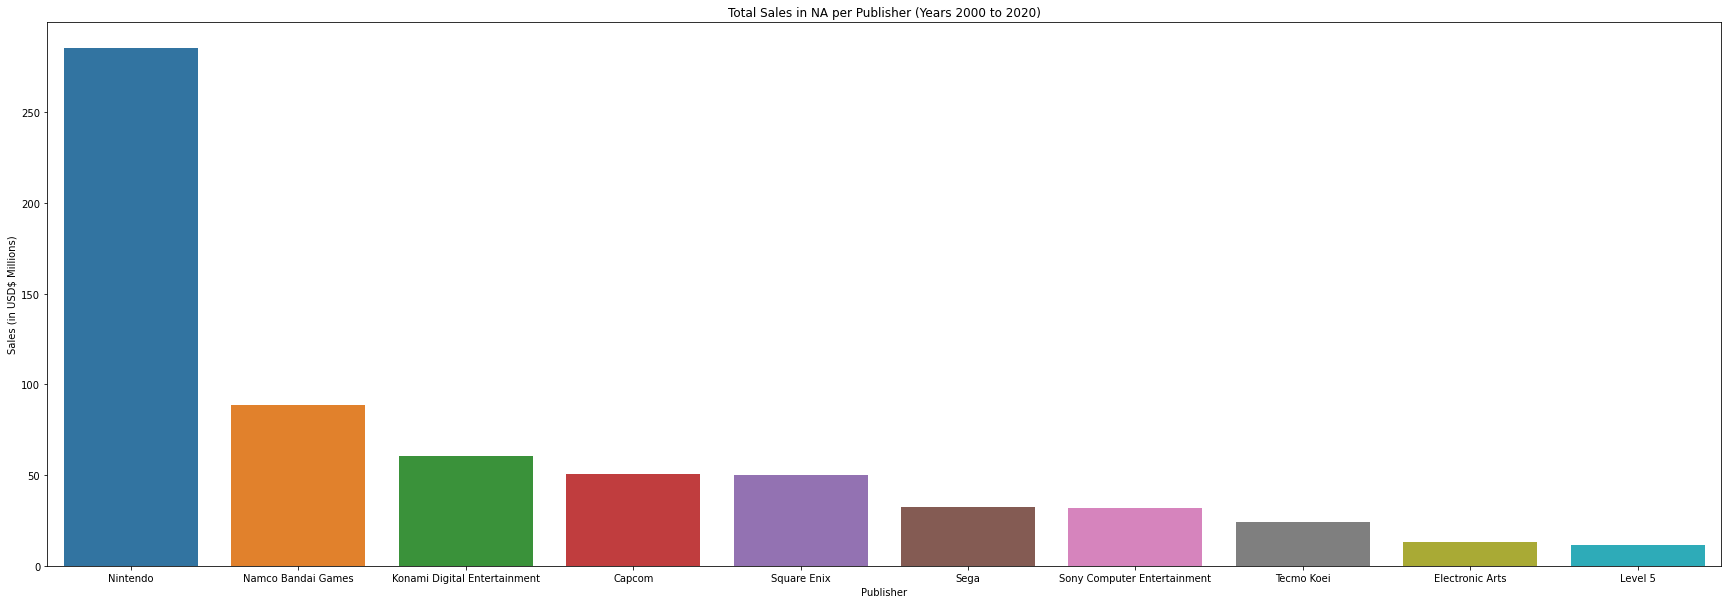

In [41]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="JP_Sales",data=JP_pub)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

> As a gamer myself, I am not surprised by Nintendo being the first place, however, other japanese Publishers seem to be way ahead from Electronic Arts
# ///////////////////////////////////////

### Other Analysis
#### Sales per Genre

In [45]:
OT_genre = sales.groupby(by=['Genre'])['Other_Sales'].sum()
OT_genre = OT_genre.reset_index()
OT_genre = OT_genre.sort_values(by=['Other_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

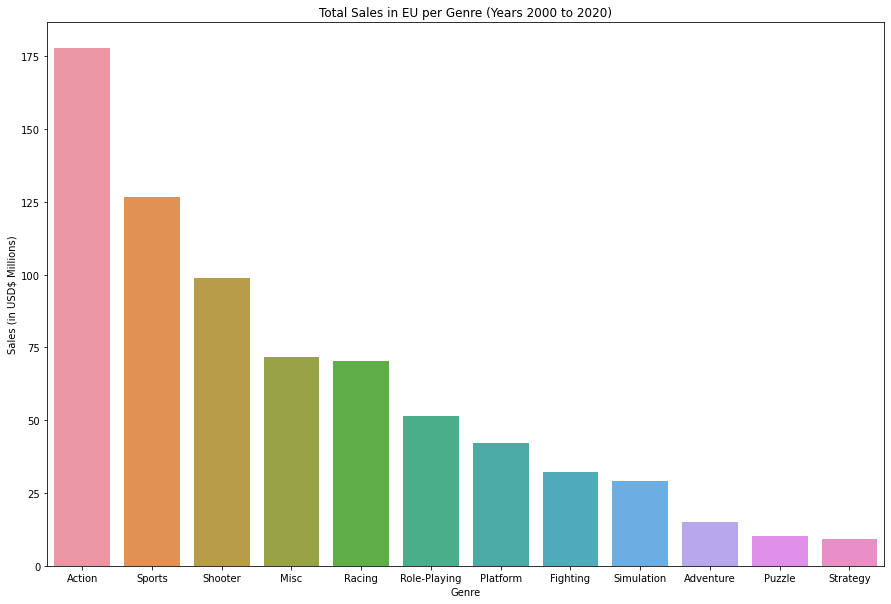

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Other_Sales",data=OT_genre)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

> The graph shows that the Action/Sports trend is back, aligning to the NA/EU preferred Genres

#### Most Requisited Platforms

In [48]:
OT_plat = sales.groupby(by=['Platform'])['Other_Sales'].sum()
OT_plat = OT_plat.reset_index()
OT_plat = OT_plat.sort_values(by=['Other_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

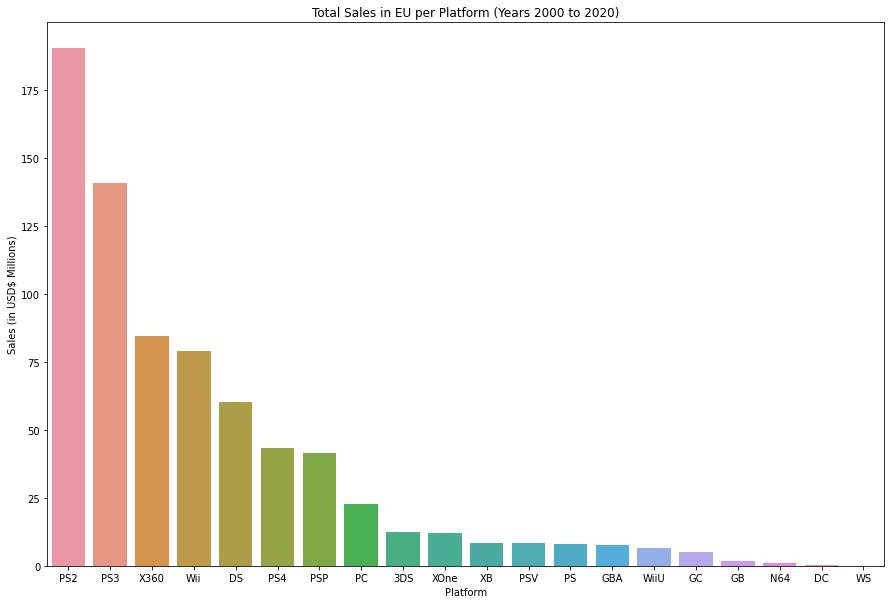

In [49]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Other_Sales", data=OT_plat)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

> PS2 and PS3 the most popular by a large margin.

#### Sales per Publisher

In [51]:
OT_pub = sales[['Publisher', 'Other_Sales']]
OT_pub = OT_pub.groupby('Publisher')['Other_Sales'].sum().sort_values(ascending=False).head(10)
OT_pub = pd.DataFrame(OT_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

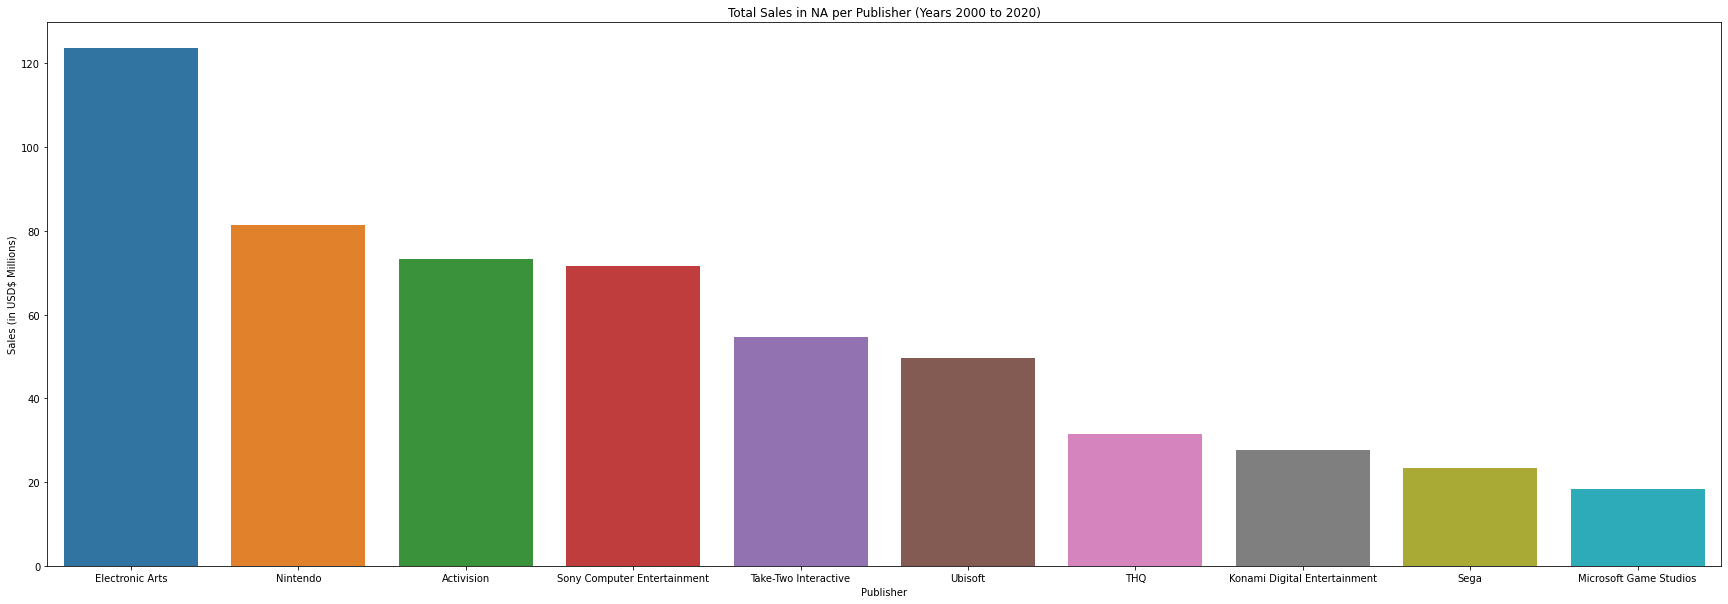

In [52]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="Other_Sales",data=OT_pub)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

> Electronic Arts back to the top once again.
# //////////////////////////////////////

### Global Analysis

#### Sales per Genre

In [56]:
GL_genre = sales.groupby(by=['Genre'])['Global_Sales'].sum()
GL_genre = GL_genre.reset_index()
GL_genre = GL_genre.sort_values(by=['Global_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

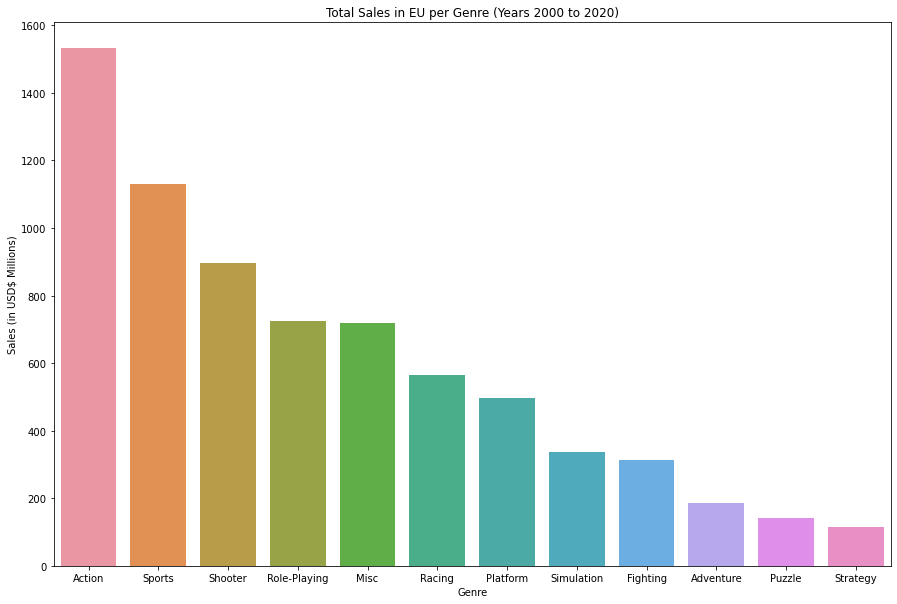

In [57]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales",data=GL_genre)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

> Comment
#### Most Requisited Platforms

In [58]:
GL_plat = sales.groupby(by=['Platform'])['Global_Sales'].sum()
GL_plat = GL_plat.reset_index()
GL_plat = GL_plat.sort_values(by=['Global_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

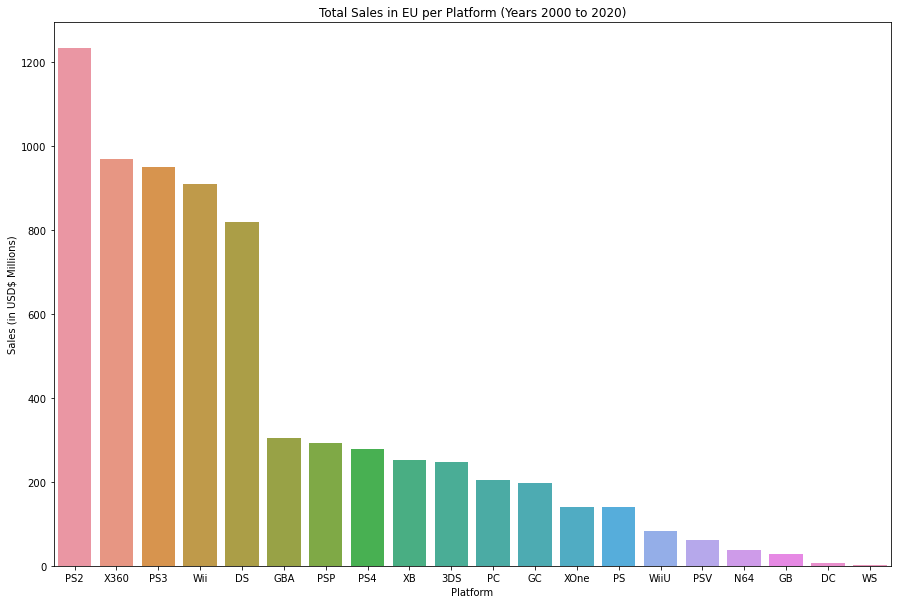

In [59]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=GL_plat)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

> Comment
#### Sales per Publisher

In [61]:
GL_pub = sales[['Publisher', 'Global_Sales']]
GL_pub = GL_pub.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
GL_pub = pd.DataFrame(GL_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

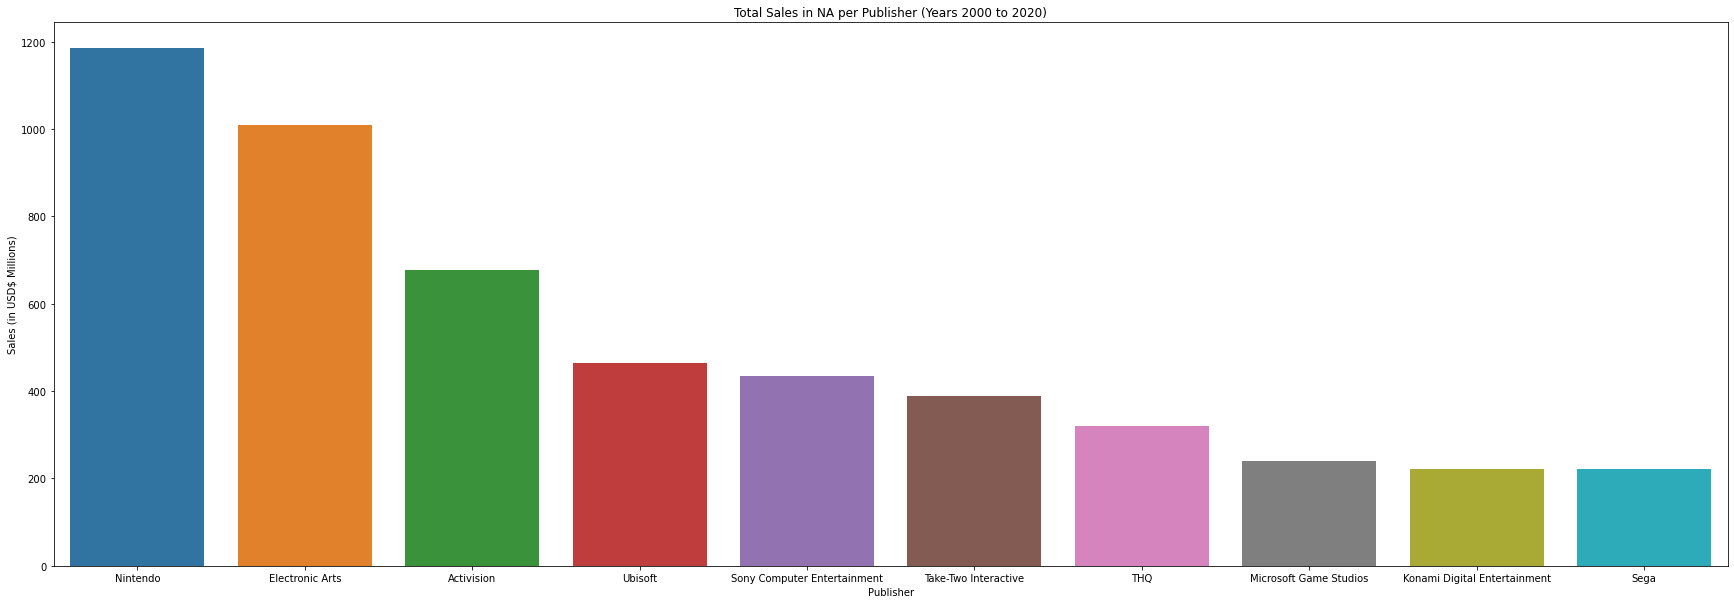

In [62]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="Global_Sales",data=GL_pub)
plt.ylabel('Sales (in USD$ Millions)')
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

> Comment
# ///////////////////////////

## Additional Analysis ...

# ------------------ TBD ------------------